In this task, I will manually implement a function to compute the gradient for a made-up optimization problem (inspired by an assignment in my ML class). The loss landscape of this optimization problem is defined by a quadratic function instead of the usual objective function + dataset. The loss landscape is visualized by the contour map below, where darker color indicate lower loss.

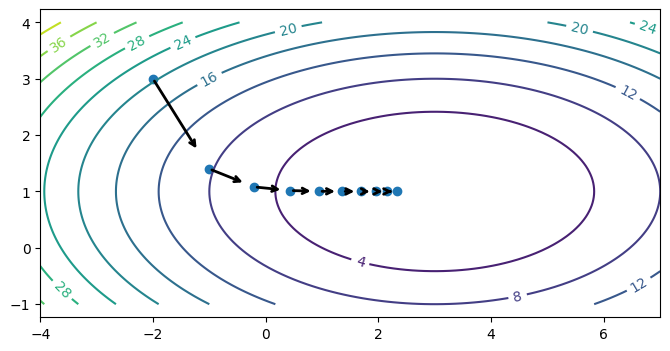

I will first start with a one parameter optimization problem, where the loss landscape is visualized by the curve. This is similar to what I have seen in my ML class.

In [ ]:
# I'm just importing necessary libraries here

import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [8, 4]

The one-parameter function that defines the toy loss landscape is $0.5(2\theta-1)^2$. Again, this is a toy setting because the loss landscape does not involve a real dataset. It's just a function of $\theta$.


In [ ]:
import numpy as np

def quadratic_function(theta):
    """
    theta: scalar or 1D array
    returns: same shape as theta
    """
    theta = np.asarray(theta)
    return 0.5 * (2*theta - 1)**2

We can visualize this loss landscape by sweeping across the x-axis using `np.linspace`. I'm aware that this is not practical in general for optimization problems involving many parameters.

Text(0.5, 1.0, 'Simple quadratic function')

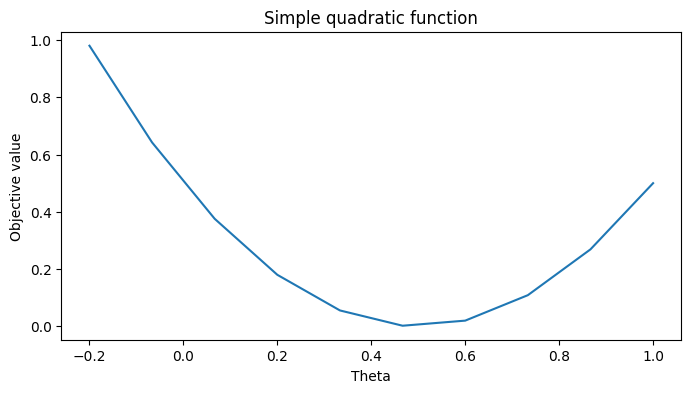

In [ ]:
# visualization code

thetas = np.linspace(-0.2,1,10)
f_vals = quadratic_function(thetas[:,np.newaxis])

plt.plot(thetas, f_vals)
plt.xlabel('Theta')
plt.ylabel('Objective value')
plt.title('Simple quadratic function')

Next, I will implement the derivative. This quadratic function is derivable, and I wrote out the derative as a closed-form mathematical equation.

$J(\theta) = 0.5(2\theta-1)^2 = 0.5 * (4\theta^2 - 4\theta + 1) = 2\theta^2 - 2\theta + 0.5$

Partial derivative:

${\partial{J}{\theta}}/{\partial \theta} = 4\theta - 2$

We can visualize the derivative at several points. The derivative should look like tangent lines.

In [ ]:
def quadratic_derivative(theta):
    """
    theta: scalar or 1D array
    returns: same shape as theta
    """
    theta = np.asarray(theta)
    return 4*theta - 2

Text(0.5, 1.0, 'Simple quadratic function')

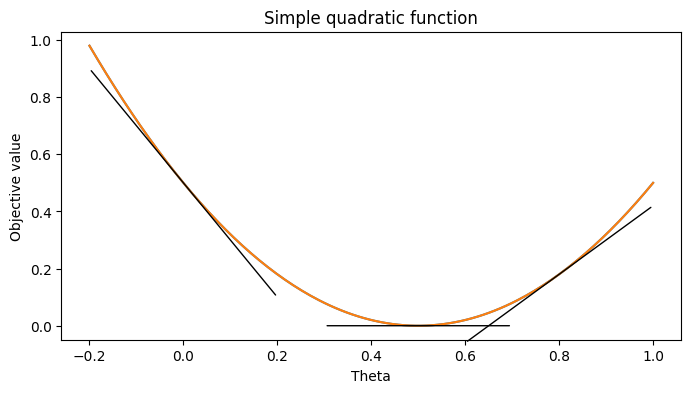

In [ ]:
# visualization code

thetas = np.linspace(-0.2, 1, 200)
f_vals = quadratic_function(thetas)

plt.plot(thetas, f_vals)
plt.xlabel("Theta")
plt.ylabel("Objective value")
plt.title("Simple quadratic function")

line_length = 0.2
pts = np.array([0.0, 0.5, 0.8])

f0s = quadratic_function(pts)
df0s = quadratic_derivative(pts)

plt.plot(thetas, f_vals)
for pt, f0, df0 in zip(pts, f0s, df0s):
    plt.annotate(
        '',
        xytext=(pt-line_length, f0-line_length*df0),
        xy=(pt+line_length, f0+line_length*df0),
        arrowprops={'arrowstyle': '-', 'lw': 1},
    )
plt.xlabel("Theta")
plt.ylabel("Objective value")
plt.title("Simple quadratic function")

Now, I tweaked the above loss function from having just one parameter to two parameters:
$0.5*((2*\theta_1-2)^2 + (\theta_0-3)^2)$.

This is the new toy loss function. In order to visualize the loss function using level curves as below, I initialized theta0 and theta1 as 2d arrays rather than 1d arrays. This is a minor detail, the expression of the quadratic function in vector form remains the same.

Text(0.5, 1.0, 'Quadratic objective contours')

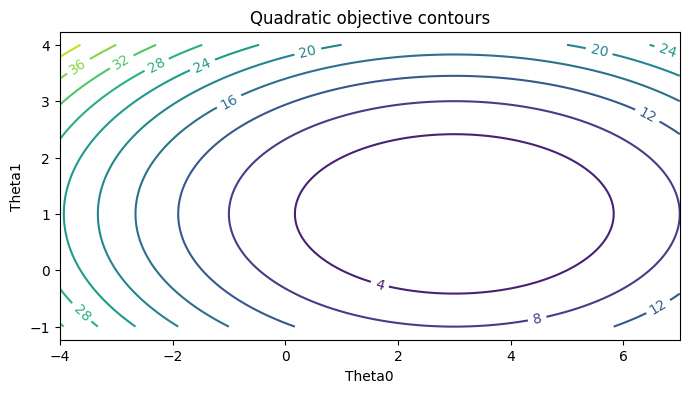

In [ ]:
def quadratic_function2d(theta0, theta1):
    theta0 = np.asarray(theta0)
    theta1 = np.asarray(theta1)
    return 0.5 * ((2 * theta1 - 2) ** 2 + (theta0 - 3) ** 2)

# visualization code
theta0_grid = np.linspace(-4, 7, 101)
theta1_grid = np.linspace(-1, 4, 101)

X, Y = np.meshgrid(theta0_grid, theta1_grid)  # both are (101, 101)
J_grid = quadratic_function2d(X, Y)

contours = plt.contour(X, Y, J_grid, 10)
plt.clabel(contours)
plt.axis("equal")
plt.xlabel("Theta0")
plt.ylabel("Theta1")
plt.title("Quadratic objective contours")

In general, the gradient with respect to a parameter should be the exact same size as the parameter itself.

One cool thing that I learned about numpy is they handle linear algebra and vector operations the same as scalar operations, so things are consistent and nice. This is pretty conveninent, but I'm aware that I should be very careful about vector operations because it's tricky to tell shapes of those vectors just by looking at the code itself.

I've computed the partial derivatives for theta0 and theta1 respectively

$J(\theta) = 0.5*((2*\theta_1-2)^2 + (\theta_0-3)^2)$

Partial derivatives:

${\partial{J}{\theta_0}}/{\partial \theta_0} = \theta_0 - 3$

and

${\partial{J}{\theta_1}}/{\partial \theta_1} = 4\theta_1 - 4$


The following helps to visualize the derivative at several random points. The derivative at each point should point towards lower loss.

Text(0.5, 1.0, 'Gradients of the quadratic function')

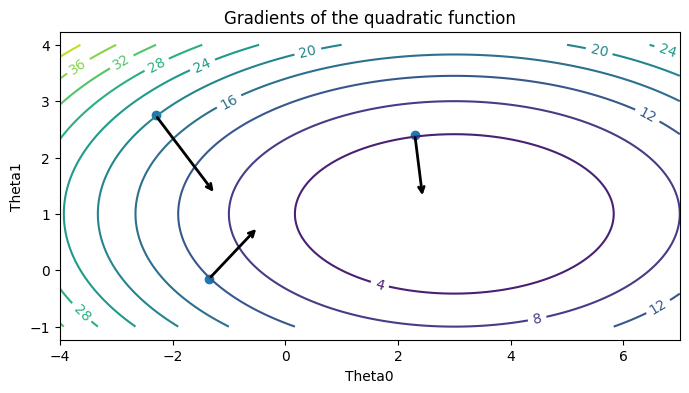

In [ ]:
def quadratic_derivative2d(theta0, theta1):
    theta0 = np.asarray(theta0)
    theta1 = np.asarray(theta1)

    partial_derivative_0 = theta0 - 3
    partial_derivative_1 = 4*theta1 - 4
    # ---------------------------------------------

    # Stack into gradient vectors
    grads = np.stack([partial_derivative_0, partial_derivative_1], axis=-1)
    return grads

# visualization code
theta0_pts = np.array([2.3, -1.35, -2.3])
theta1_pts = np.array([2.4, -0.15, 2.75])

dfs = quadratic_derivative2d(theta0_pts, theta1_pts)  # (N, 2)
line_length = 0.2

contours = plt.contour(X, Y, J_grid, 10)
plt.clabel(contours)

for t0, t1, g in zip(theta0_pts, theta1_pts, dfs):
    plt.annotate(
        '',
        xytext=(t0, t1),
        xy=(t0 - line_length*g[0], t1 - line_length*g[1]),
        arrowprops={'arrowstyle': '->', 'lw': 2},
    )

plt.scatter(theta0_pts, theta1_pts)
plt.axis("equal")
plt.xlabel("Theta0")
plt.ylabel("Theta1")
plt.title("Gradients of the quadratic function")

The gradients look reasonable in the figure above where the arrows pointing towards lower loss. Now, I will run the following gradient descent algorithm.

(np.float64(-4.0), np.float64(7.0), np.float64(-1.0), np.float64(4.0))

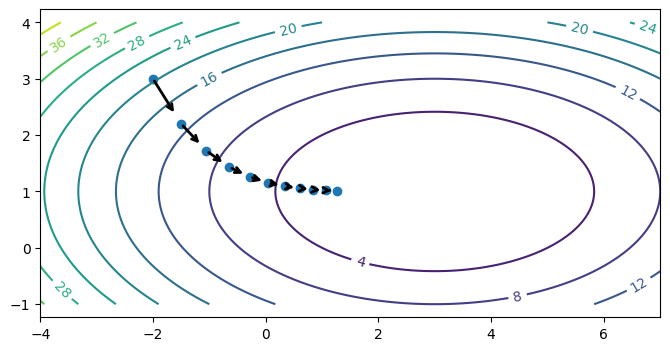

In [ ]:
convergence_threshold = 2e-1
step_size = 1e-1
theta, theta_prev = np.array([[-2], [3]]), np.array([[0], [0]])
opt_pts = [theta.flatten()]
opt_grads = []

while np.linalg.norm(theta - theta_prev) > convergence_threshold:
    # repeat this while the value of the function is decreasing
    theta_prev = theta
    gradient = quadratic_derivative2d(*theta).reshape([2,1])
    theta = theta_prev - step_size * gradient
    # also, record the points visited by gradient descent and their gradients
    opt_pts += [theta.flatten()]
    opt_grads += [gradient.flatten()]

opt_pts = np.array(opt_pts)
opt_grads = np.array(opt_grads)

contours = plt.contour(X, Y, J_grid, 10)
plt.clabel(contours)
plt.scatter(opt_pts[:,0], opt_pts[:,1])

for opt_pt, opt_grad in zip(opt_pts, opt_grads):
    plt.annotate('', xytext=(opt_pt[0], opt_pt[1]),
                 xy=(opt_pt[0]-0.8*step_size*opt_grad[0], opt_pt[1]-0.8*step_size*opt_grad[1]),
                 arrowprops={'arrowstyle': '->', 'lw': 2}, va='center', ha='center')

plt.axis('equal')